### Prosper

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [209]:
data = pd.read_csv('fraud\prosperLoanData.csv')

In [ ]:
data.columns

In [145]:
#checking the existing var types
list(np.unique(data.dtypes))

[dtype('bool'), dtype('int64'), dtype('float64'), dtype('O')]

In [144]:
#checking the vars with a specific data type
data.dtypes[data.dtypes=='O'].index

Index(['ListingKey', 'ListingCreationDate', 'CreditGrade', 'LoanStatus',
       'ClosedDate', 'ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'GroupKey', 'DateCreditPulled',
       'FirstRecordedCreditLine', 'IncomeRange', 'LoanKey',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey'],
      dtype='object')

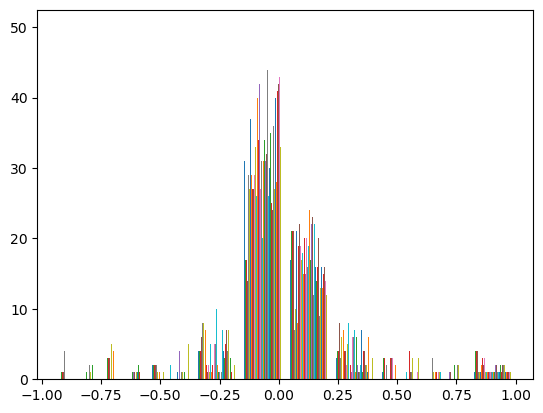

In [163]:
plt.hist(np.array(data3));

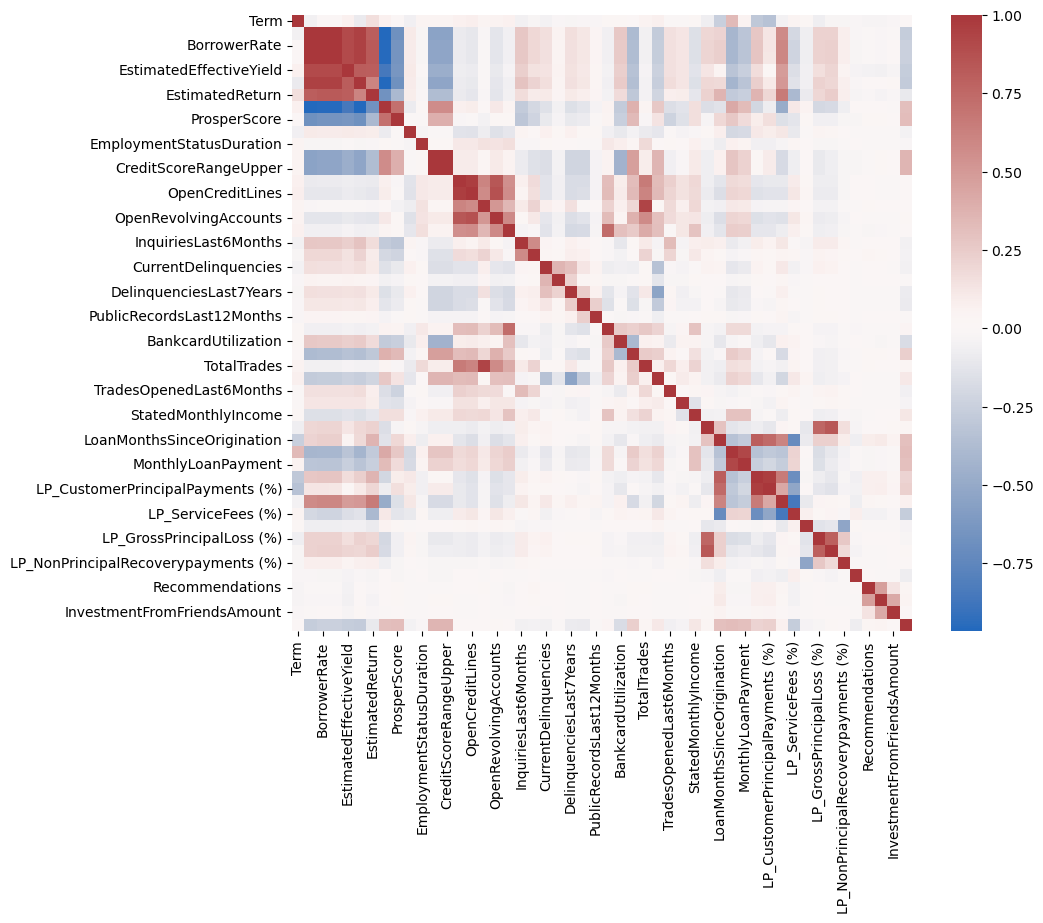

In [235]:
#extract numerical vars
import numpy as np
import seaborn as sns
data2 = pd.DataFrame()
for col in data.count().index[data.count()>=0.5*len(data)]:
    if (data[col].dtype == 'int64') or (data[col].dtype == 'float64'):
        data2[col] = data[col]
data2 = data2.drop(columns=['ListingNumber','LoanNumber'])
data2['LP_GrossPrincipalLoss'] = data2['LP_GrossPrincipalLoss'] / data2['LoanOriginalAmount']
data2['LP_CustomerPayments'] = data2['LP_CustomerPayments'] / data2['LoanOriginalAmount']
data2['LP_CustomerPrincipalPayments'] = data2['LP_CustomerPrincipalPayments'] / data2['LoanOriginalAmount']
data2['LP_InterestandFees'] = data2['LP_InterestandFees'] / data2['LoanOriginalAmount']
data2['LP_ServiceFees'] = data2['LP_ServiceFees'] / data2['LoanOriginalAmount']
data2['LP_GrossPrincipalLoss'] = data2['LP_GrossPrincipalLoss'] / data2['LoanOriginalAmount']
data2['LP_NetPrincipalLoss'] = data2['LP_NetPrincipalLoss'] / data2['LoanOriginalAmount']
data2['LP_NonPrincipalRecoverypayments'] = data2['LP_NonPrincipalRecoverypayments'] / data2['LoanOriginalAmount']
data2 = data2.rename(columns={'LP_GrossPrincipalLoss':'LP_GrossPrincipalLoss (%)','LP_CustomerPayments':'LP_CustomerPayments (%)',
                              'LP_CustomerPrincipalPayments':'LP_CustomerPrincipalPayments (%)',
                              'LP_InterestandFees':'LP_InterestandFees (%)','LP_ServiceFees':'LP_ServiceFees (%)',
                              'LP_GrossPrincipalLoss':'LP_GrossPrincipalLoss (%)',
                              'LP_NetPrincipalLoss':'LP_NetPrincipalLoss (%)',
                              'LP_NonPrincipalRecoverypayments':'LP_NonPrincipalRecoverypayments (%)'})
data2 = data2.dropna().reset_index(drop=True)
data2_std = (data2 - np.mean(data2,axis=0)) / np.std(data2,axis=0)
data3 = pd.DataFrame(np.corrcoef(data2_std.T), index=data2.columns, columns=data2.columns)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data3,cmap='vlag');#,annot=np.corrcoef(data2_std.T))
# np.corrcoef(data2_std.T)

In [236]:
data2.shape

(77543, 50)

In [237]:
for i,col in enumerate(data2.columns):
    print(i,col)
    exec('F%s = data2_std[col][(data2_std[col] < 3) & (data2_std[col] > -3)]' % i)

0 Term
1 BorrowerAPR
2 BorrowerRate
3 LenderYield
4 EstimatedEffectiveYield
5 EstimatedLoss
6 EstimatedReturn
7 ProsperRating (numeric)
8 ProsperScore
9 ListingCategory (numeric)
10 EmploymentStatusDuration
11 CreditScoreRangeLower
12 CreditScoreRangeUpper
13 CurrentCreditLines
14 OpenCreditLines
15 TotalCreditLinespast7years
16 OpenRevolvingAccounts
17 OpenRevolvingMonthlyPayment
18 InquiriesLast6Months
19 TotalInquiries
20 CurrentDelinquencies
21 AmountDelinquent
22 DelinquenciesLast7Years
23 PublicRecordsLast10Years
24 PublicRecordsLast12Months
25 RevolvingCreditBalance
26 BankcardUtilization
27 AvailableBankcardCredit
28 TotalTrades
29 TradesNeverDelinquent (percentage)
30 TradesOpenedLast6Months
31 DebtToIncomeRatio
32 StatedMonthlyIncome
33 LoanCurrentDaysDelinquent
34 LoanMonthsSinceOrigination
35 LoanOriginalAmount
36 MonthlyLoanPayment
37 LP_CustomerPayments (%)
38 LP_CustomerPrincipalPayments (%)
39 LP_InterestandFees (%)
40 LP_ServiceFees (%)
41 LP_CollectionFees
42 LP_Gross

<Axes: xlabel='EmploymentStatusDuration', ylabel='Density'>

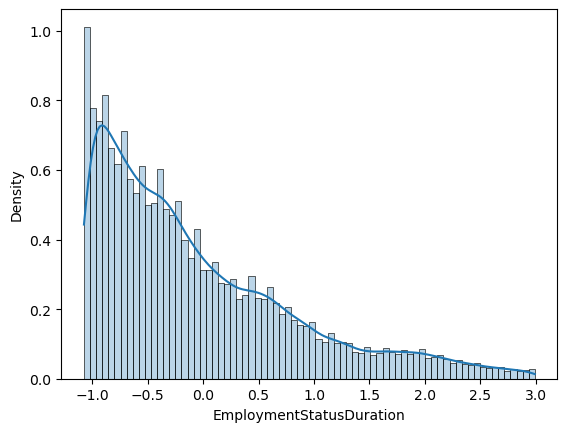

In [238]:
sns.histplot(F10,kde=True,label='BorrowerAPR',stat="density",alpha=0.3)

* Data is not labeled as far as I can see. So this can make the feature selection process 
* Did not perform any dimensionality reduction
* 

In [254]:
from distfit import distfit
dist = distfit()
dist.fit_transform(F10);
print(dist.summary.loc[:2,['name','score']])
# dist.plot()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 2.2513] [loc=-0.058 scale=0.894]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.128973] [loc=-1.077 scale=1.019]
[distfit] >INFO> [pareto    ] [0.05 sec] [RSS: 0.128973] [loc=-67108865.077 scale=67108864.000]
[distfit] >INFO> [dweibull  ] [0.33 sec] [RSS: 2.37701] [loc=-0.060 scale=0.769]
[distfit] >INFO> [t         ] [1.51 sec] [RSS: 1.90602] [loc=-0.208 scale=0.712]
[distfit] >INFO> [genextreme] [0.99 sec] [RSS: 0.811758] [loc=-0.557 scale=0.509]
[distfit] >INFO> [gamma     ] [0.57 sec] [RSS: 1.02345] [loc=-1.077 scale=1.753]
[distfit] >INFO> [lognorm   ] [0.42 sec] [RSS: 0.596809] [loc=-1.211 scale=0.836]
[distfit] >INFO> [beta      ] [1.51 sec] [RSS: 0.958336] [loc=-1.077 scale=5.191]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 4.06934] [loc=-1.077 scale=4.071]
[distfit] >INFO> [loggamma  ] [0.60 sec] [RSS: 2.28724] [loc=-192.691 scale=28.070]
[distfit] >INFO> Compute confidence inte

      name     score
0   pareto  0.128973
1    expon  0.128973
2  lognorm  0.596809


In [261]:
dist.summary.iloc[:3,:6]

,name,score,loc,scale,arg,params
0,pareto,0.128973,-67108865.076975,67108864.0,"(65879126.437920205,)","(65879126.437920205, -67108865.07697485, 67108..."
1,expon,0.128973,-1.076975,1.018667,(),"(-1.0769748472164584, 1.0186665806693977)"
2,lognorm,0.596809,-1.210627,0.835693,"(0.8462737742113438,)","(0.8462737742113438, -1.2106274882012857, 0.83..."


In [ ]:
import statsmodels.api as sm
from scipy import stats
sm.qqplot(F10, stats.gamma, fit=True, line="45", ax=ax)

In [208]:
data2.LoanMonthsSinceOrigination

0       24
1       27
2       23
3       24
4       40
        ..
1460    31
1461    47
1462    56
1463    16
1464    51
Name: LoanMonthsSinceOrigination, Length: 1465, dtype: int64